# ORIE 4741 Project: COVID-19 Vaccine Discovery

**Group member: Meiqi Wu(mw849), Yuwei Liu (yl3388), Jialiang Sun(js3553), Vaish Gajaraj (vg289)**

## 1. Prepocessing

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

data_dir = './DATA/'
SEED = 123
np.random.seed(SEED)

In [3]:
bcell = pd.read_csv(f'{data_dir}/input_bcell.csv')
bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [4]:
bcell.shape

(14387, 14)

In [5]:
sars = pd.read_csv(f'{data_dir}/input_sars.csv')
sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [6]:
sars.shape

(520, 14)

In [7]:
covid = pd.read_csv(f'{data_dir}/input_covid.csv')
covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [8]:
covid.shape

(20312, 13)

In [9]:
# combine bcell and sars data as the training data
df = pd.concat([bcell, sars], axis=0, ignore_index=True)
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [10]:
df.shape

(14907, 14)

In [11]:
df.drop_duplicates(inplace = True)
df.shape

(14896, 14)

In [12]:
# feature columns
feature_cols = [col for col in df.columns if col not in ['parent_protein_id', 'protein_seq', 'peptide_seq', 'target']]
feature_cols

['start_position',
 'end_position',
 'chou_fasman',
 'emini',
 'kolaskar_tongaonkar',
 'parker',
 'isoelectric_point',
 'aromaticity',
 'hydrophobicity',
 'stability']

In [13]:
# check whether there's missing values in the features and target columns
(df[feature_cols+['target']].isnull()).sum()

start_position         0
end_position           0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [14]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14896 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14896 non-null  object 
 1   protein_seq          14896 non-null  object 
 2   start_position       14896 non-null  int64  
 3   end_position         14896 non-null  int64  
 4   peptide_seq          14896 non-null  object 
 5   chou_fasman          14896 non-null  float64
 6   emini                14896 non-null  float64
 7   kolaskar_tongaonkar  14896 non-null  float64
 8   parker               14896 non-null  float64
 9   isoelectric_point    14896 non-null  float64
 10  aromaticity          14896 non-null  float64
 11  hydrophobicity       14896 non-null  float64
 12  stability            14896 non-null  float64
 13  target               14896 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.7+ MB


In [15]:
# check the number of unique properties
print('The number of unique parent protein is: ',df['parent_protein_id'].nunique())
print('The number of unique parent peptide is: ',df['peptide_seq'].nunique())

The number of unique parent protein is:  761
The number of unique parent peptide is:  14841


In [50]:
# calculate sequence length
df['peptide_len'] = df['end_position'] - df['start_position'] + 1

In [51]:
df_target = df[df['target'] == 1]
df_nontarget = df[df['target'] == 0]

## 2. Exploratory data analysis
### (a) Peptide features

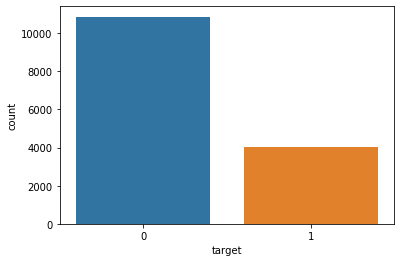

In [18]:
sns.countplot(x = 'target', data = df)

In [19]:
df['peptide_len'].describe()

count    14896.000000
mean        11.662930
std          5.476346
min          5.000000
25%          9.000000
50%         10.000000
75%         15.000000
max        393.000000
Name: peptide_len, dtype: float64

Text(0.5, 1.0, 'percentage of target peptide by peptide length')

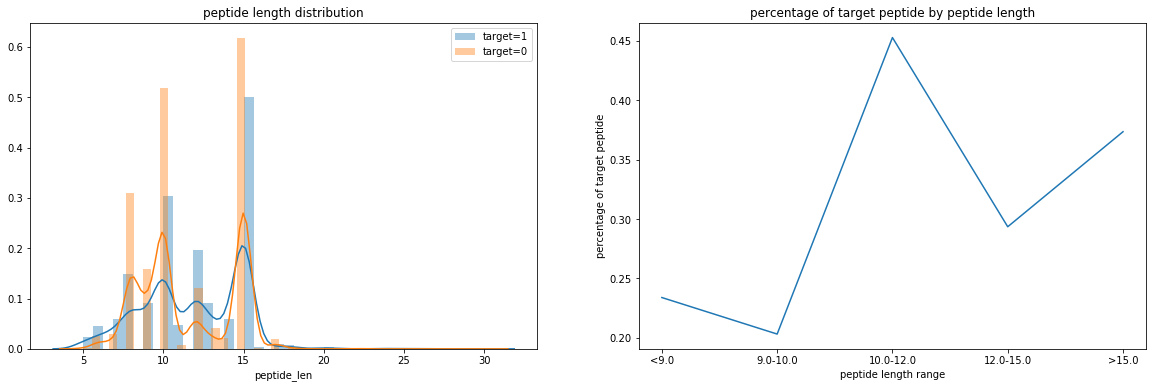

In [20]:
# compare distribution of peptide length
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target[df_target['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget[df_nontarget['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('peptide length distribution')
peptide_len = df[['peptide_len','target']]
peptide_len['length range'] = pd.qcut(peptide_len['peptide_len'],5,labels=['<9.0','9.0-10.0','10.0-12.0','12.0-15.0','>15.0'])
ax[1].plot(peptide_len.groupby('length range')['target'].mean())
ax[1].set_xlabel('peptide length range')
ax[1].set_ylabel('percentage of target peptide')
ax[1].set_title('percentage of target peptide by peptide length')

Peptide distributions of target and non-target sample are similar, but peptide with length 10 to 12 has a higher probability of seeing corresponding activity.

In [21]:
df['chou_fasman'].describe()

count    14896.000000
mean         0.994906
std          0.123667
min          0.534000
25%          0.913000
50%          0.991000
75%          1.073000
max          1.546000
Name: chou_fasman, dtype: float64

Text(0.5, 1.0, 'average chou fasman by target')

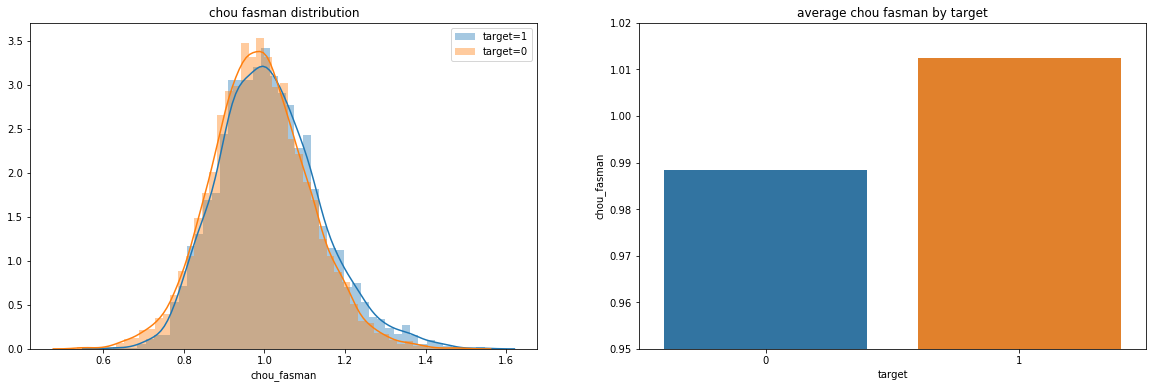

In [22]:
# compare chou fasman
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['chou_fasman'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['chou_fasman'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('chou fasman distribution')
pep_bychou = df.groupby('target')['chou_fasman'].mean().reset_index()
sns.barplot(x = pep_bychou['target'],y=pep_bychou['chou_fasman'])
ax[1].set_ylim(0.95,1.02)
ax[1].set_title('average chou fasman by target')

Chou fasman has a nice noremal distribution, while target peptide tend to have a higher value for chou fasman.

In [23]:
df['emini'].describe()

count    14896.000000
mean         1.074277
std          1.736873
min          0.000000
25%          0.244000
50%          0.551000
75%          1.207000
max         40.605000
Name: emini, dtype: float64

Text(0.5, 1.0, 'average emini by target')

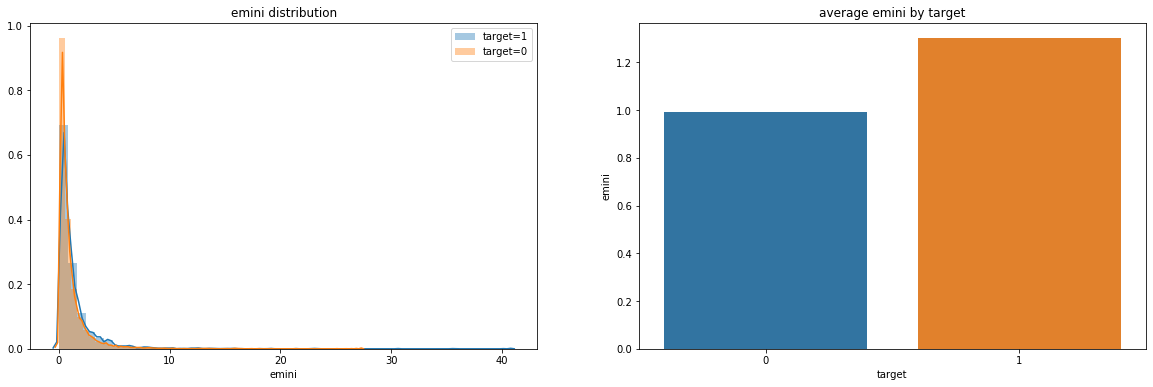

In [25]:
# compare emini
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['emini'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['emini'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byemini = df.groupby('target')['emini'].mean().reset_index()
sns.barplot(x = pep_byemini['target'],y=pep_byemini['emini'])
ax[1].set_title('average emini by target')

In [23]:
df['kolaskar_tongaonkar'].describe()

count    14896.000000
mean         1.021807
std          0.053430
min          0.838000
25%          0.987000
50%          1.021000
75%          1.055000
max          1.255000
Name: kolaskar_tongaonkar, dtype: float64

(1.0, 1.03)

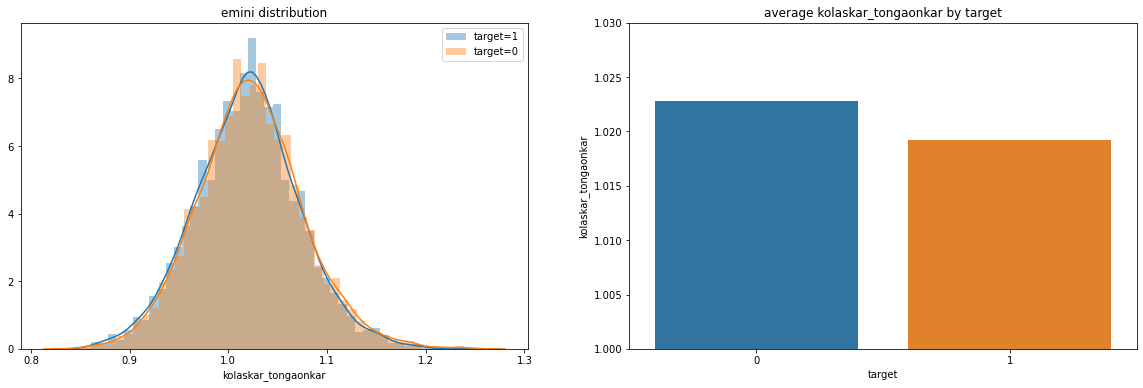

In [24]:
# compare kolaskar_tongaonkar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['kolaskar_tongaonkar'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['kolaskar_tongaonkar'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_bykol = df.groupby('target')['kolaskar_tongaonkar'].mean().reset_index()
sns.barplot(x = pep_bykol['target'],y=pep_bykol['kolaskar_tongaonkar'])
ax[1].set_title('average kolaskar_tongaonkar by target')
ax[1].set_ylim(1.0,1.03)

In [25]:
df['parker'].describe()

count    14896.000000
mean         1.749920
std          1.955039
min         -9.029000
25%          0.600000
50%          1.775000
75%          2.962000
max          9.120000
Name: parker, dtype: float64

(1.6, 1.9)

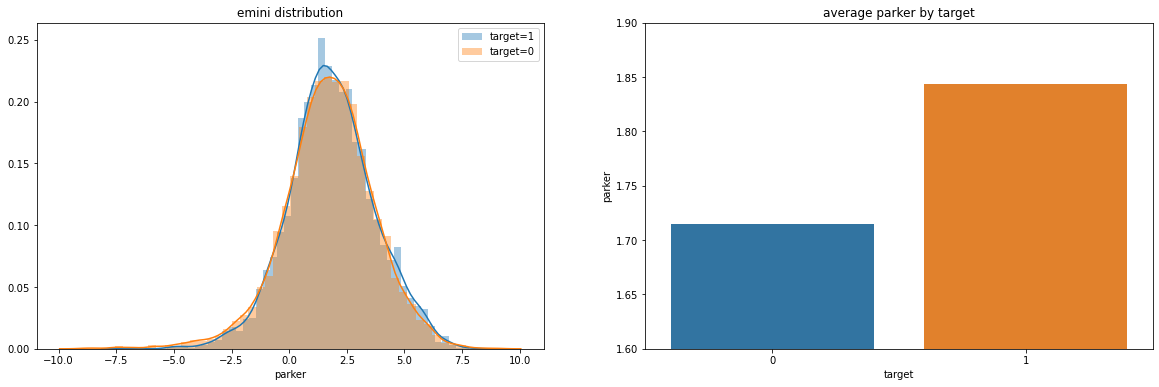

In [26]:
# compare parker
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['parker'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['parker'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byparker = df.groupby('target')['parker'].mean().reset_index()
sns.barplot(x = pep_byparker['target'],y=pep_byparker['parker'])
ax[1].set_title('average parker by target')
ax[1].set_ylim(1.6,1.9)

### (b) Parent Protein Features

In [27]:
df['isoelectric_point'].describe()

count    14896.000000
mean         7.016036
std          1.875898
min          3.686096
25%          5.569763
50%          6.447815
75%          8.676575
max         12.232727
Name: isoelectric_point, dtype: float64

(5.0, 8.0)

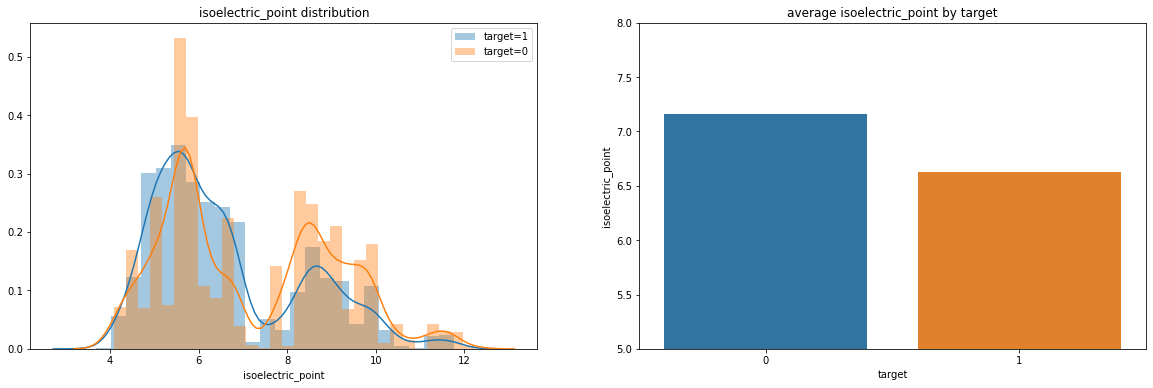

In [28]:
# compare isoelectric_point
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['isoelectric_point'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['isoelectric_point'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('isoelectric_point distribution')
pep_byiso = df.groupby('target')['isoelectric_point'].mean().reset_index()
sns.barplot(x = pep_byiso['target'],y=pep_byiso['isoelectric_point'])
ax[1].set_title('average isoelectric_point by target')
ax[1].set_ylim(5,8)

In [29]:
df['aromaticity'].describe()

count    14896.000000
mean         0.077128
std          0.026377
min          0.000000
25%          0.062500
50%          0.075949
75%          0.093458
max          0.182254
Name: aromaticity, dtype: float64

(0.07, 0.08)

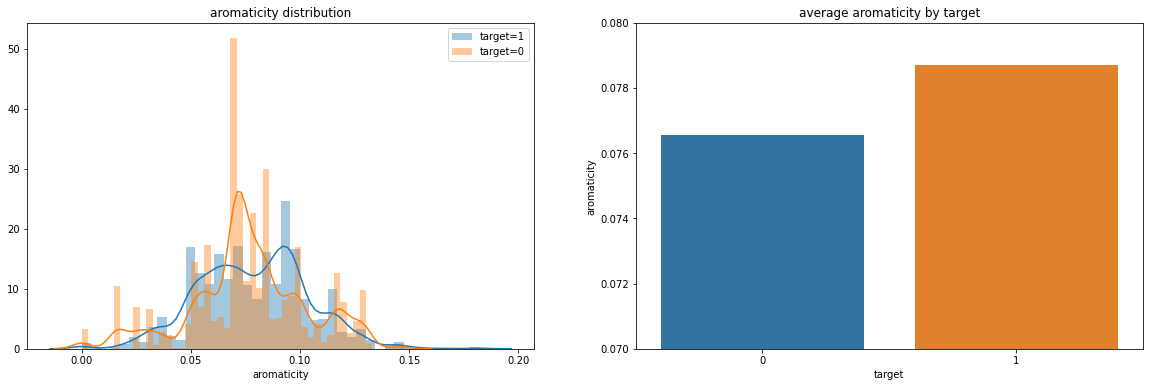

In [30]:
# compare aromaticity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['aromaticity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['aromaticity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('aromaticity distribution')
pep_byar = df.groupby('target')['aromaticity'].mean().reset_index()
sns.barplot(x = pep_byar['target'],y=pep_byar['aromaticity'])
ax[1].set_title('average aromaticity by target')
ax[1].set_ylim(0.07,0.08)

In [28]:
df['hydrophobicity'].describe()

count    14896.000000
mean        -0.394228
std          0.392888
min         -1.971171
25%         -0.600131
50%         -0.318259
75%         -0.189591
max          1.267089
Name: hydrophobicity, dtype: float64

Text(0.5, 1.0, 'average hydrophobicity by target')

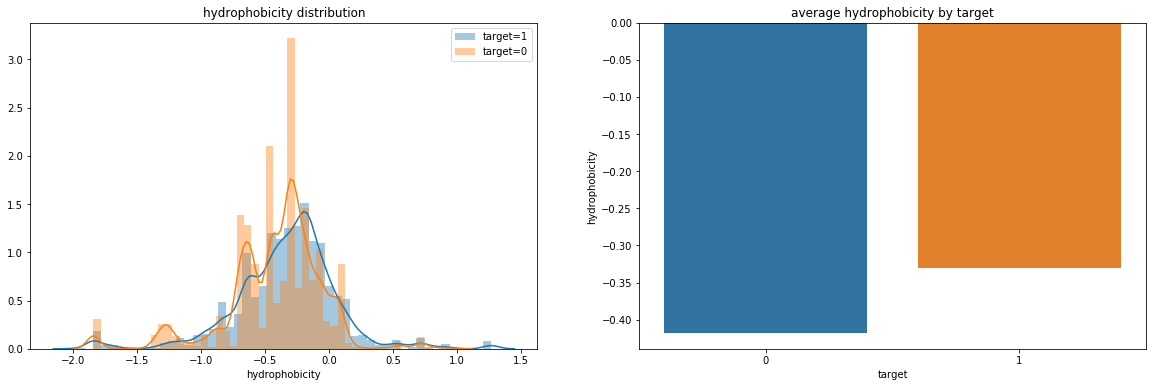

In [29]:
# compare hydrophobicity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['hydrophobicity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['hydrophobicity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('hydrophobicity distribution')
pep_byhy = df.groupby('target')['hydrophobicity'].mean().reset_index()
sns.barplot(x = pep_byhy['target'],y=pep_byhy['hydrophobicity'])
ax[1].set_title('average hydrophobicity by target')

In [30]:
df['stability'].describe()

count    14896.000000
mean        43.343509
std         16.505895
min          5.448936
25%         31.725753
50%         41.984246
75%         49.101172
max        137.046667
Name: stability, dtype: float64

(40, 45)

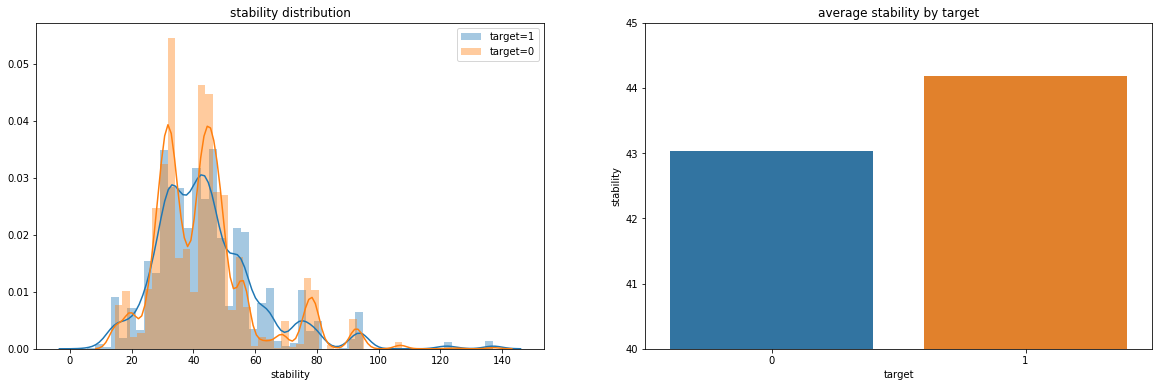

In [31]:
# compare stability
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['stability'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['stability'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('stability distribution')
pep_bystab = df.groupby('target')['stability'].mean().reset_index()
sns.barplot(x = pep_bystab['target'],y=pep_bystab['stability'])
ax[1].set_title('average stability by target')
ax[1].set_ylim(40,45)

### (c) Correlation

In [32]:
corr_df = df[['peptide_len','chou_fasman','emini','kolaskar_tongaonkar','parker','isoelectric_point','aromaticity','hydrophobicity','stability','target']].corr()

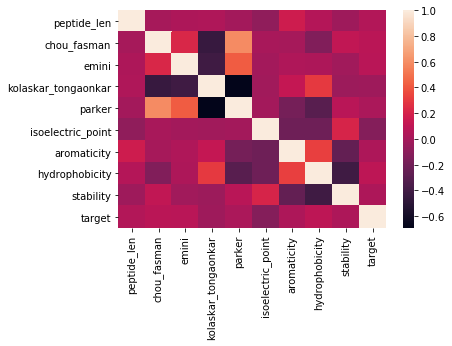

In [33]:
sns.heatmap(corr_df)

## 3. Split data 

In [34]:
# split df into training set and test set
x_trn, x_tst, y_trn, y_tst = train_test_split(df[feature_cols], df.target, test_size=0.2, random_state=123)

In [35]:
# normalization
scaler = StandardScaler()
x_trn = pd.DataFrame(scaler.fit_transform(x_trn), index=x_trn.index, columns=feature_cols)
x_tst = pd.DataFrame(scaler.transform(x_tst), index=x_tst.index, columns=feature_cols)

In [36]:
x_trn.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
4867,-0.795281,-0.799466,1.484161,-0.419750,0.098171,0.038793,-0.741437,0.784951,0.349133,-1.051296
2282,-0.842355,-0.852050,-1.993336,0.170693,0.397501,-0.155406,1.392648,1.695270,2.072571,-0.782838
12531,0.954770,0.963494,0.298100,0.098023,-0.107619,-0.504454,-0.690291,1.959872,-0.134117,-0.008223
14867,2.283923,2.291941,1.217902,1.472504,-0.294701,0.670963,-0.773192,1.475080,0.849067,-0.613920
13379,-0.781436,-0.785628,-1.323656,-0.099548,0.042046,0.049014,-0.608887,-0.000184,-0.531024,-0.711129


In [37]:
x_trn.shape

(11916, 10)

## 4. Logistic regression

In [38]:
lr_model = LogisticRegression(random_state=10, max_iter=10000)
lr_model.fit(x_trn, y_trn)
lr_err = 1 - lr_model.score(x_tst, y_tst)
lr_err

0.26946308724832213

In [39]:
# Predicted values
y_trn_pred1 = lr_model.predict(x_trn)
y_tst_pred1 = lr_model.predict(x_tst)

In [40]:
# coefficient and intercept
coef_element = np.array(feature_cols+['intercept'])
coef1 = pd.DataFrame(np.vstack((coef_element,np.append(lr_model.coef_,lr_model.intercept_)))).transpose()
coef1.columns = ["Variables", "Coefficients"]
coef1

,Variables,Coefficients
0,start_position,-1.2641645343839032
1,end_position,0.980236514525795
2,chou_fasman,0.24068317983464002
3,emini,0.13097868855550818
4,kolaskar_tongaonkar,-0.10094036767796896
5,parker,-0.1664215041558607
6,isoelectric_point,-0.3601570523753828
7,aromaticity,0.03130427285310091
8,hydrophobicity,0.2841896435661876
9,stability,0.2237769718280507


In [41]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [42]:
regression_results(y_trn, y_trn_pred1)

explained variance:  -0.0295
r2:  -0.3365
MAE:  0.2638
MSE:  0.2638
RMSE:  0.5136


In [43]:
regression_results(y_tst, y_tst_pred1)

explained variance:  -0.0771
r2:  -0.3635
MAE:  0.2695
MSE:  0.2695
RMSE:  0.5191


The negative explained variance and $R^2$ shows that the plain logistic regression model does not fit the data well. We need to consider a new model. Now let's try logistic regression with penalty.

In [44]:
# Explore the logistic regression with penalty that has the lowest test error
N = np.array(range(0,15))
alpha = 0.00001*(4**N)
error_trn_lr = np.zeros(15)
error_tst_lr = np.zeros(15)

for i in range(0,15):
    lri = LogisticRegression(random_state=10, solver='sag', max_iter=10000, penalty='l2',C=alpha[i])
    lri.fit(x_trn, y_trn)
    error_trn_lr[i] = 1 - lri.score(x_trn, y_trn)
    error_tst_lr[i] = 1 - lri.score(x_tst, y_tst)

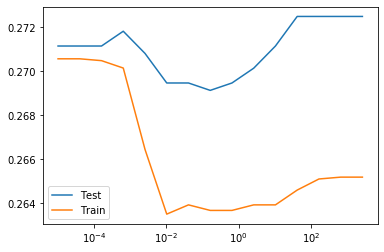

In [45]:
plt.figure(1)
plt.semilogx(alpha, error_tst_lr, label = 'Test')
plt.semilogx(alpha, error_trn_lr, label = 'Train')
plt.legend()

In [49]:
# Using the model with the smallest test error
penalty = alpha[np.argmin(error_tst_lr)]
lr_l2 = LogisticRegression(random_state=10, solver='sag', max_iter=10000, penalty='l2',C=penalty)
lr_l2.fit(x_trn, y_trn)
lr_err2 = 1 - lr_l2.score(x_tst, y_tst)
lr_err2

0.26912751677852353

In [50]:
y_trn_pred2 = lr_l2.predict(x_trn)
y_tst_pred2 = lr_l2.predict(x_tst)

In [51]:
regression_results(y_trn, y_trn_pred2)

explained variance:  -0.0289
r2:  -0.336
MAE:  0.2637
MSE:  0.2637
RMSE:  0.5135


In [52]:
regression_results(y_tst, y_tst_pred2)

explained variance:  -0.073
r2:  -0.3618
MAE:  0.2691
MSE:  0.2691
RMSE:  0.5188


The penalized logistic regression still gives us a negative explained variance. Hence, we need to consider other models.

## 5. Random forest

In [53]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_depth=10, random_state=0)
rf_model.fit(x_trn, y_trn)
rf_err = 1 - rf_model.score(x_tst, y_tst)
rf_err

0.16744966442953024

In [54]:
y_trn_pred3 = rf_model.predict(x_trn)
y_tst_pred3 = rf_model.predict(x_tst)

In [55]:
regression_results(y_trn, y_trn_pred3)

explained variance:  0.4815
r2:  0.4523
MAE:  0.1081
MSE:  0.1081
RMSE:  0.3288


In [56]:
regression_results(y_tst, y_tst_pred3)

explained variance:  0.1836
r2:  0.1527
MAE:  0.1674
MSE:  0.1674
RMSE:  0.4092


The random forest model does a better job than the logistic regression, both test MSE and train MSE are low, and the explained variances are positive, yet not very high.  
  
Now let's extract a small part of the tree and visualize it.

In [57]:
# Pull out one tree from the forest
tree = rf_model.estimators_[3]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

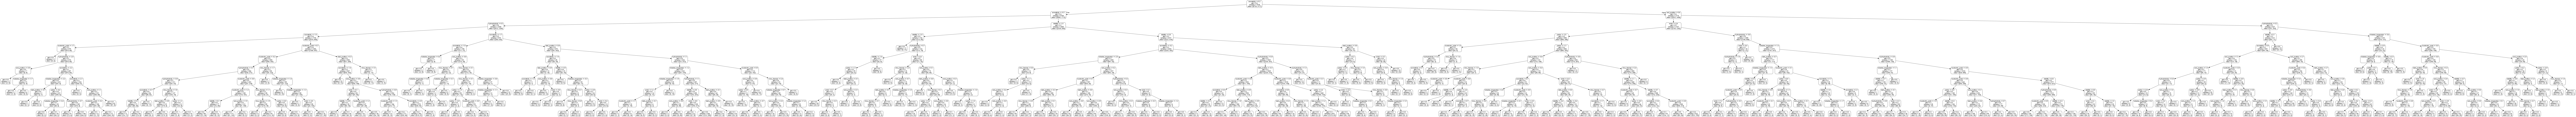

In [58]:
Image(filename='tree.png')  # The graph is too wide and maybe we should not present it in jupyter

# 6. PCA Analysis

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

X = df[feature_cols]
y = df_target


pca.fit(X)
X = pca.transform(X)




<Figure size 288x216 with 0 Axes>

In [92]:
scaler=StandardScaler()#instantiate
scaler.fit(df[feature_cols]) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(df[feature_cols])# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("after scaling minimum", X_scaled.min(axis=0))

pca=decomposition.PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)



after scaling minimum [-0.85862261 -0.87391338 -3.72710653 -0.61853316 -3.44027109 -5.51358948
 -1.77517701 -2.92410543 -4.01385615 -2.29589755]
shape of X_pca (14896, 3)


In [93]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


[0.41303684 0.36239915 0.224564  ]


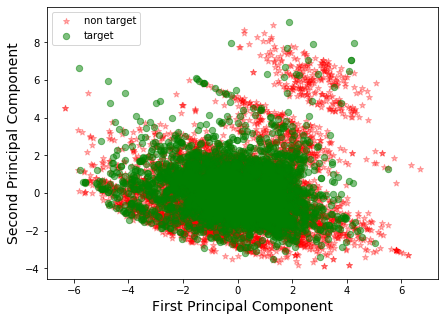

In [94]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df['target']
cdict={0:'red',1:'green'}
labl={0:'non target',1:'target'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix =np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
    
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


PCA Component dependencies on variables


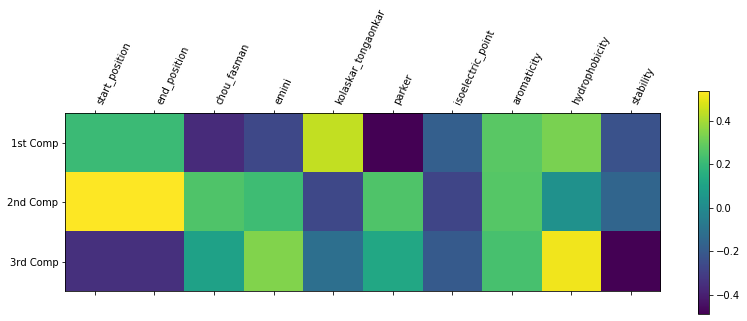

In [97]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_cols)),feature_cols,rotation=65,ha='left')
plt.tight_layout()
print("PCA Component dependencies on variables")
plt.show()


In [ ]:
#This first PC can be used to build our CNN